In [1]:
#Do more injuries occur when the speed limit is higher? (above 35)

In [2]:
#Import Dependencies
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress

In [3]:
#Reading in the DataSets
crash_initial_data = pd.read_csv("Crash_Reporting_-_Drivers_Data.csv", low_memory=False)
crash_initial_data.head()

,Report Number,Local Case Number,Agency Name,ACRS Report Type,Crash Date/Time,Route Type,Road Name,Cross-Street Type,Cross-Street Name,Off-Road Description,...,Speed Limit,Driverless Vehicle,Parked Vehicle,Vehicle Year,Vehicle Make,Vehicle Model,Equipment Problems,Latitude,Longitude,Location
0,MCP3040003N,190026050,Montgomery County Police,Property Damage Crash,5/31/2019 15:00,NaN,NaN,NaN,NaN,PARKING LOT OF 3215 SPARTAN RD,...,15,No,No,2004,HONDA,TK,UNKNOWN,39.150044,-77.063089,"(39.15004368, -77.06308884)"
1,MCP1307000K,190024786,Montgomery County Police,Property Damage Crash,5/24/2019 17:00,NaN,NaN,NaN,NaN,PARKING LOT,...,0,No,No,0,UNK,UNK,NaN,39.199047,-77.250743,"(39.19904667, -77.25074333)"
2,MCP2846008X,230034260,Montgomery County Police,Property Damage Crash,7/17/2023 10:45,County,SELFRIDGE RD,County,RANDOLPH RD,NaN,...,35,No,No,2003,FORD,TK,NO MISUSE,39.054588,-77.085974,"(39.05458848, -77.08597423)"
3,MCP32610017,230034668,Montgomery County Police,Property Damage Crash,7/20/2023 23:40,Maryland (State),MUNCASTER MILL RD,County,SHADY GROVE RD,NaN,...,45,No,No,2023,TOYT,CP,NO MISUSE,39.148721,-77.147111,"(39.14872076, -77.14711061)"
4,EJ78520081,230033429,Gaithersburg Police Depar,Property Damage Crash,7/13/2023 17:40,Municipality,PERRY PKWY,Unknown,ENT TO SHOPPING CENTER,NaN,...,25,No,No,2001,KENWORTH,TRUCK,NaN,39.149085,-77.210731,"(39.14908542, -77.21073135)"


In [5]:
#Creating a dataframe with only the necessary columns, include
    #"Speed Limit" column has data on the posted speed limit
    #"Injury Severity" has dat on whether or not an injury occured and the severity
    #"Report Number" has the unique identifier for each crash
speed_injury_data = pd.DataFrame({
    'Report Number': crash_initial_data['Report Number'],
    'Person ID': crash_initial_data['Person ID'],
    'Injury Severity': crash_initial_data['Injury Severity'],
    'Speed Limit': crash_initial_data['Speed Limit']
})

speed_injury_data.head()

,Report Number,Person ID,Injury Severity,Speed Limit
0,MCP3040003N,DE2A24CD-7919-4F8D-BABF-5B75CE12D21E,NO APPARENT INJURY,15
1,MCP1307000K,6208FA7B-5DC4-4B54-AD60-0C06DFE2AE81,NO APPARENT INJURY,0
2,MCP2846008X,9ACC5A7E-47A1-438F-BF0E-40B0A8632055,NO APPARENT INJURY,35
3,MCP32610017,E611A3F8-5F7D-465B-8DE0-3814027998F1,NO APPARENT INJURY,45
4,EJ78520081,3C7F6951-1701-44DC-9824-88DF4E32352E,NO APPARENT INJURY,25


In [6]:
#Looking for duplicates, no duplicates found
duplicates = speed_injury_data[speed_injury_data.duplicated(subset = ["Report Number", "Person ID"])]
duplicates

,Report Number,Person ID,Injury Severity,Speed Limit


In [7]:
#Looking for missing data
speed_injury_data.count()

Report Number      168157
Person ID          168157
Injury Severity    168157
Speed Limit        168157
dtype: int64

In [8]:
#Finding the number of crashes, the data set is structured with a unique line for each vehicle in a crash
#ie, there are two lines for two vehicles who were in one crash
#accident_total is number of unique accidents, not number of vehicles in an accident
unique_report_numbers = speed_injury_data["Report Number"].unique()
accident_total = len(unique_report_numbers)
accident_total

94601

In [9]:
#looking for NaN for Speed Limit and Injury Severity
unique_speed_numbers = speed_injury_data["Speed Limit"].unique()
unique_speed_numbers

array([15,  0, 35, 45, 25, 30, 40, 50,  5, 10, 55, 20, 65, 60, 75, 70],
      dtype=int64)

In [10]:
#Finding the different type of injuries
unique_injury_types = speed_injury_data["Injury Severity"].unique()
unique_injury_types

array(['NO APPARENT INJURY', 'SUSPECTED MINOR INJURY',
       'SUSPECTED SERIOUS INJURY', 'POSSIBLE INJURY', 'FATAL INJURY'],
      dtype=object)

In [11]:
#Creating dummy variables for each level of injury
#No Apparent Injury
speed_injury_data["No Injury"] = 0
speed_injury_data.loc[speed_injury_data["Injury Severity"] == "NO APPARENT INJURY", "No Injury"] = 1
#Suspected Minor Injury
speed_injury_data["Minor Injury"] = 0
speed_injury_data.loc[speed_injury_data["Injury Severity"] == "SUSPECTED MINOR INJURY", "Minor Injury"] = 1
#Possible Injury
speed_injury_data["Possible Injury"] = 0
speed_injury_data.loc[speed_injury_data["Injury Severity"] == "POSSIBLE INJURY", "Possible Injury"] = 1
#Suspected Serious Injury
speed_injury_data["Serious Injury"] = 0
speed_injury_data.loc[speed_injury_data["Injury Severity"] == "SUSPECTED SERIOUS INJURY", "Serious Injury"] = 1
#Fatal Injury
speed_injury_data["Fatal Injury"] = 0
speed_injury_data.loc[speed_injury_data["Injury Severity"] == "FATAL INJURY", "Fatal Injury"] = 1

#Creating a dummy variabels for if there is an injury or not, 1 if there is an injury
speed_injury_data["Injury"] = 0
speed_injury_data.loc[speed_injury_data["No Injury"] == 0, "Injury"] = 1

speed_injury_data.head()

,Report Number,Person ID,Injury Severity,Speed Limit,No Injury,Minor Injury,Possible Injury,Serious Injury,Fatal Injury,Injury
0,MCP3040003N,DE2A24CD-7919-4F8D-BABF-5B75CE12D21E,NO APPARENT INJURY,15,1,0,0,0,0,0
1,MCP1307000K,6208FA7B-5DC4-4B54-AD60-0C06DFE2AE81,NO APPARENT INJURY,0,1,0,0,0,0,0
2,MCP2846008X,9ACC5A7E-47A1-438F-BF0E-40B0A8632055,NO APPARENT INJURY,35,1,0,0,0,0,0
3,MCP32610017,E611A3F8-5F7D-465B-8DE0-3814027998F1,NO APPARENT INJURY,45,1,0,0,0,0,0
4,EJ78520081,3C7F6951-1701-44DC-9824-88DF4E32352E,NO APPARENT INJURY,25,1,0,0,0,0,0


In [12]:
#Creating a data frame of speed limit and percent vehicles at that speed limit had an injury
no_injury = speed_injury_data.groupby("Speed Limit")["No Injury"].sum()
minor_injury = speed_injury_data.groupby("Speed Limit")["Minor Injury"].sum()
possible_injury = speed_injury_data.groupby("Speed Limit")["Possible Injury"].sum()
serious_injury = speed_injury_data.groupby("Speed Limit")["Serious Injury"].sum()
fatal_injury = speed_injury_data.groupby("Speed Limit")["Fatal Injury"].sum()
injury = speed_injury_data.groupby("Speed Limit")["Injury"].sum()

#Creating a count column for the number of crashes at each speed
count_crashes = speed_injury_data.groupby("Speed Limit")["Injury Severity"].count()

speed_injury_severity = pd.merge(no_injury, minor_injury, on="Speed Limit", how="left")
speed_injury_severity = pd.merge(speed_injury_severity, possible_injury, on="Speed Limit", how="left")
speed_injury_severity = pd.merge(speed_injury_severity, serious_injury, on="Speed Limit", how="left")
speed_injury_severity = pd.merge(speed_injury_severity, fatal_injury, on="Speed Limit", how="left")
speed_injury_severity = pd.merge(speed_injury_severity, injury, on="Speed Limit", how="left")
speed_injury_severity = pd.merge(speed_injury_severity, count_crashes, on="Speed Limit", how="left")
speed_injury_severity = speed_injury_severity.rename(columns={"Injury Severity":"Accident Count"})

In [13]:
#Resetting the index
speed_injury_severity = speed_injury_severity.reset_index(drop=False)

#Dropping speed limit of 0 from the dataset becuase is speed limit unkown
#Also dropping speed of 70 and 75 because of the low N
speed_injury_severity = speed_injury_severity [speed_injury_severity["Speed Limit"].isin([0, 70, 75])==False]

###NOTE: Will need to note the N of each that were dropped, and include the new vehicle total in the analysis
    #0 speed limit was dropped becuase this category includes locations with no posted speed limit, ex. parking lots
        #when what the research question is asking about is speed limits, there were 4648 of these accidents
    #70 speed limit was dropped because there were only 6 accidents in this category
    #75 speed limit was dropped because there was only 1 accident in this category

#Adding in columns for the percent of each type of injury
speed_injury_severity["No Injury(%)"]=(speed_injury_severity["No Injury"]/speed_injury_severity["Accident Count"]*100).round(2)
speed_injury_severity["Minor Injury(%)"]=(speed_injury_severity["Minor Injury"]/speed_injury_severity["Accident Count"]*100).round(2)
speed_injury_severity["Possible Injury(%)"]=(speed_injury_severity["Possible Injury"]/speed_injury_severity["Accident Count"]*100).round(2)
speed_injury_severity["Serious Injury(%)"]=(speed_injury_severity["Serious Injury"]/speed_injury_severity["Accident Count"]*100).round(2)
speed_injury_severity["Fatal Injury(%)"]=(speed_injury_severity["Fatal Injury"]/speed_injury_severity["Accident Count"]*100).round(2)
speed_injury_severity["Injury(%)"]=(speed_injury_severity["Injury"]/speed_injury_severity["Accident Count"]*100).round(2)

#Column for percent of vehicles in accidents that occured at each speed
#Finding the total number of vehicles that were in accidents
vehicle_sum = speed_injury_severity["Accident Count"].sum()
speed_injury_severity["Accidents at this Speed(%)"]=((speed_injury_severity["Accident Count"]/vehicle_sum)*100).round(2)

speed_injury_severity


,Speed Limit,No Injury,Minor Injury,Possible Injury,Serious Injury,Fatal Injury,Injury,Accident Count,No Injury(%),Minor Injury(%),Possible Injury(%),Serious Injury(%),Fatal Injury(%),Injury(%),Accidents at this Speed(%)
1,5,3907,70,124,6,0,200,4107,95.13,1.70,3.02,0.15,0.00,4.87,2.51
2,10,2846,81,96,5,0,182,3028,93.99,2.68,3.17,0.17,0.00,6.01,1.85
3,15,5571,138,246,13,0,397,5968,93.35,2.31,4.12,0.22,0.00,6.65,3.65
4,20,1018,47,67,8,1,123,1141,89.22,4.12,5.87,0.70,0.09,10.78,0.70
5,25,20188,1330,1787,117,13,3247,23435,86.14,5.68,7.63,0.50,0.06,13.86,14.33
6,30,18619,1665,2324,175,20,4184,22803,81.65,7.30,10.19,0.77,0.09,18.35,13.95
7,35,39826,3530,5411,412,24,9377,49203,80.94,7.17,11.00,0.84,0.05,19.06,30.09
8,40,25604,2831,4180,370,47,7428,33032,77.51,8.57,12.65,1.12,0.14,22.49,20.20
9,45,9393,1084,1596,141,18,2839,12232,76.79,8.86,13.05,1.15,0.15,23.21,7.48
10,50,3354,479,614,83,25,1201,4555,73.63,10.52,13.48,1.82,0.55,26.37,2.79


In [56]:
#Summary statistics

#Total number of cars in an accident
cars_in_accident = speed_injury_severity["Accident Count"].sum()
print(f"Number of cars in accidents: {cars_in_accident}")

#Total number of injuries included in the analysis
injury_total = speed_injury_severity["Injury"].sum()
print(f"Total number of injuries: {injury_total}")

#% of accidents in the analysis that had an injury
accident_with_injuries_percent = (injury_total/cars_in_accident)*100
print(f"Percent of cars who were in an accident and had an injury: {accident_with_injuries_percent}")

#Speed with the highest percent of injuries
max_injuries_speed_index = speed_injury_severity["Injury(%)"].idxmax()
max_injuries_speed = speed_injury_severity["Speed Limit"].iloc[max_injuries_speed_index-1]
print(f"The highest percent of injuries occur at the speed limit: {max_injuries_speed}mph")

#Speed with the lowest percent of injuries
min_injuries_speed_index = speed_injury_severity["Injury(%)"].idxmin()
min_injuries_speed = speed_injury_severity["Speed Limit"].iloc[min_injuries_speed_index-1]
print(f"The highest percent of injuries occur at the speed limit: {min_injuries_speed}mph")

#Range for percent of injuries
range_injuries = (speed_injury_severity["Injury(%)"].max()) - (speed_injury_severity["Injury(%)"].min())
print(f"The range from the highest percent of injuries to the lowest is: {range_injuries}%")

#Date range of the dataset
crash_initial_data["Date"] = pd.to_datetime(crash_initial_data["Crash Date/Time"])
crash_initial_data["Date y/m/d"] = pd.to_datetime(crash_initial_data["Date"]).dt.date
min_date = crash_initial_data["Date y/m/d"].min()
max_date = crash_initial_data["Date y/m/d"].max()
print(f"The earlist date in the data set is: {min_date} (y/m/d format)")
print(f"The latest date in the data set is: {max_date} (y/m/d format)")

Number of cars in accidents: 163502
Total number of injuries: 29939
Percent of cars who were in an accident and had an injury: 18.311090995828796
The highest percent of injuries occur at the speed limit: 50mph
The highest percent of injuries occur at the speed limit: 5mph
The range from the highest percent of injuries to the lowest is: 21.5%
The earlist date in the data set is: 2015-01-01 (y/m/d format)
The latest date in the data set is: 2023-11-01 (y/m/d format)


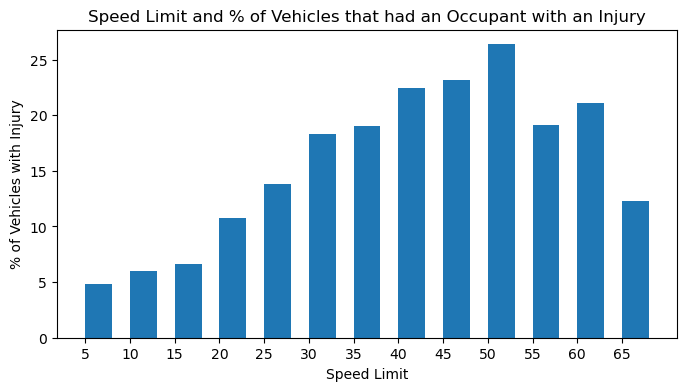

In [15]:
#Do more injuries occur when the speed limit is higher? 
    #As speed limit increases do injuries increase
    ###Make sure to note that injuries are classified as possible injuries

#Graph of speed and accident of not
x_axis = speed_injury_severity["Speed Limit"]
y_axis = speed_injury_severity["Injury(%)"]
fig, ax = plt.subplots(figsize=(8, 4))
plt.bar(x_axis, y_axis, align="edge", width=3)
plt.xlabel("Speed Limit")
plt.ylabel("% of Vehicles with Injury")
plt.title("Speed Limit and % of Vehicles that had an Occupant with an Injury")
plt.xticks(speed_injury_severity["Speed Limit"])

#Export as a png file
plt.savefig("fig_speed_injury.png")

plt.show()

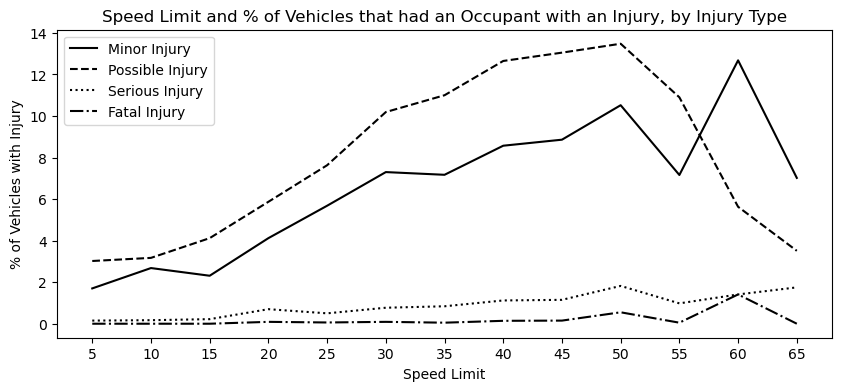

In [27]:
#Also a secondary question, does accident severity increase with speed?
        #Really this is two different ways of thinking about injury, in the first graph thinking of injury as any injury,
        #while for the second graph are caring about injury severity
    #As speed limit increases does injury severity increase?

fig, ax = plt.subplots(figsize=(10, 4))
speed_limit = speed_injury_severity["Speed Limit"]

minor_injury, = plt.plot(speed_limit, speed_injury_severity["Minor Injury(%)"], color = "black", label = "Minor Injury")
possible_injury, = plt.plot(speed_limit, speed_injury_severity["Possible Injury(%)"], color = "black", linestyle= '--', label = "Possible Injury")
serious_injury, = plt.plot(speed_limit, speed_injury_severity["Serious Injury(%)"], color = "black", linestyle= ':', label = "Serious Injury")
fatal_injury, = plt.plot(speed_limit, speed_injury_severity["Fatal Injury(%)"], color = "black", linestyle= '-.', label = "Fatal Injury")

#formatting
plt.xlabel("Speed Limit")
plt.ylabel("% of Vehicles with Injury")
plt.title("Speed Limit and % of Vehicles that had an Occupant with an Injury, by Injury Type")
plt.xticks(speed_injury_severity["Speed Limit"])
plt.legend(handles=[minor_injury, possible_injury, serious_injury, fatal_injury], loc="best")

#Export as a png file
plt.savefig("fig_speed_injury_severity.png")

plt.show()